In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

In [2]:
df = pd.read_csv("mail_data.csv")

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df['Message'], df['Category'], test_size=0.2, random_state=42)

In [4]:
# Naive Bayes
nb_clf = Pipeline([
    ('vect', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
])

nb_clf.fit(X_train, y_train)
nb_predictions = nb_clf.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_predictions))
print("Naive Bayes Classification Report:\n", classification_report(y_test, nb_predictions))

Naive Bayes Accuracy: 0.9766816143497757
Naive Bayes Classification Report:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.99       966
        spam       1.00      0.83      0.90       149

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [5]:
# SVM
svm_clf = Pipeline([
    ('vect', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('clf', SVC(kernel='linear'))
])

svm_clf.fit(X_train, y_train)
svm_predictions = svm_clf.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))
print("SVM Classification Report:\n", classification_report(y_test, svm_predictions))

SVM Accuracy: 0.9919282511210762
SVM Classification Report:
               precision    recall  f1-score   support

         ham       0.99      1.00      1.00       966
        spam       0.99      0.95      0.97       149

    accuracy                           0.99      1115
   macro avg       0.99      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



In [6]:
# Decision Tree
dt_clf = Pipeline([
    ('vect', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('clf', DecisionTreeClassifier())
])

dt_clf.fit(X_train, y_train)
dt_predictions = dt_clf.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_predictions))
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_predictions))

Decision Tree Accuracy: 0.9659192825112107
Decision Tree Classification Report:
               precision    recall  f1-score   support

         ham       0.97      0.99      0.98       966
        spam       0.91      0.83      0.87       149

    accuracy                           0.97      1115
   macro avg       0.94      0.91      0.92      1115
weighted avg       0.97      0.97      0.97      1115



In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm, naive_bayes, tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

In [10]:
# Unduh stopwords dari nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
# Baca data dari file CSV
 
data = pd.read_csv('mail_data.csv')
print(data.head())

  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


In [12]:
# Pra-pemrosesan teks
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [13]:
def preprocess_text(text):
    # Mengubah teks menjadi lowercase
    text = text.lower()
    # Menghapus karakter khusus dan angka
    text = ''.join([char for char in text if char not in string.punctuation and not char.isdigit()])
    # Tokenisasi kata-kata
    tokens = word_tokenize(text)
    # Menghilangkan stopwords dan melakukan lemmatisasi
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Menggabungkan kembali kata-kata yang telah diproses
    processed_text = ' '.join(tokens)
    return processed_text

In [14]:
 # Melakukan pra-pemrosesan pada kolom 'Message'
data['Processed_Message'] = data['Message'].apply(preprocess_text)

In [15]:
 # Membagi data menjadi set pelatihan dan pengujian (80% pelatihan, 20% pengujian)
X = data['Processed_Message']
y = data['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
 # Menggunakan TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [17]:
# Membuat dan melatih model SVM
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)


SVC(kernel='linear')

In [18]:
 # Melakukan prediksi pada data uji untuk SVM
svm_pred = svm_model.predict(X_test_tfidf)


In [19]:
# Menghitung akurasi SVM
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)


SVM Accuracy: 0.9838565022421525


In [20]:
# Menampilkan confusion matrix untuk SVM
svm_cm = confusion_matrix(y_test, svm_pred)
print("Confusion Matrix SVM:\n", svm_cm)


Confusion Matrix SVM:
 [[964   2]
 [ 16 133]]


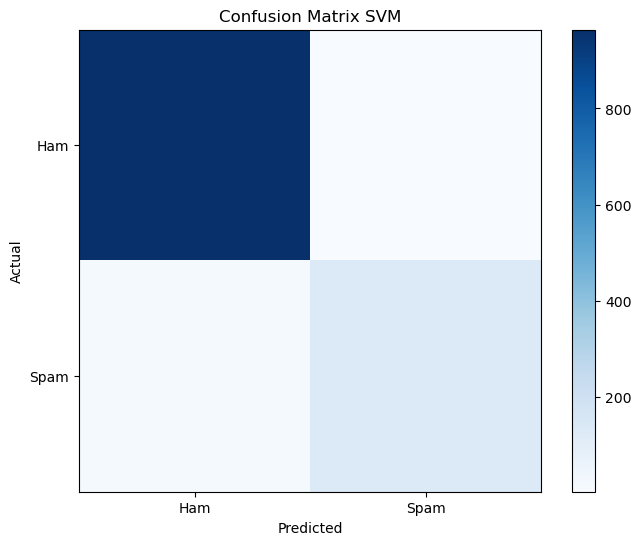

In [21]:
# Visualisasi confusion matrix SVM
plt.figure(figsize=(8, 6))
plt.imshow(svm_cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix SVM')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.yticks([0, 1], ['Ham', 'Spam'])
plt.show()

In [22]:
# Membuat dan melatih model Naive Bayes
nb_model = naive_bayes.MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)


MultinomialNB()

In [23]:
# Melakukan prediksi pada data uji untuk Naive Bayes
nb_pred = nb_model.predict(X_test_tfidf)


In [24]:
# Menghitung akurasi Naive Bayes
nb_accuracy = accuracy_score(y_test, nb_pred)
print("Naive Bayes Accuracy:", nb_accuracy)


Naive Bayes Accuracy: 0.967713004484305


In [25]:
# Menampilkan confusion matrix untuk Naive Bayes
nb_cm = confusion_matrix(y_test, nb_pred)
print("Confusion Matrix Naive Bayes:\n", nb_cm)


Confusion Matrix Naive Bayes:
 [[966   0]
 [ 36 113]]


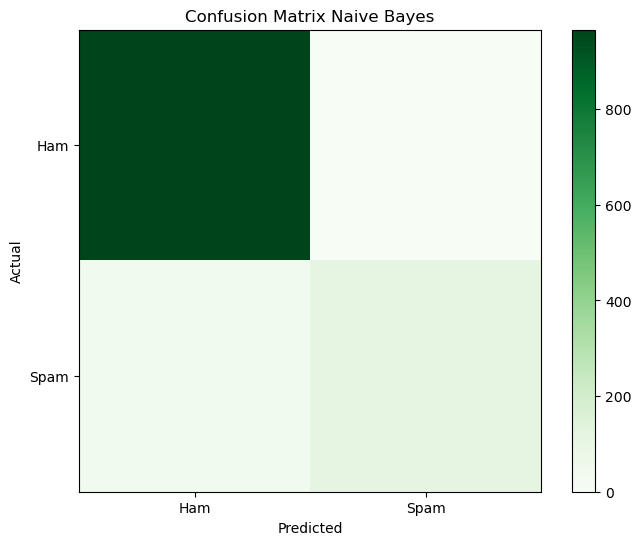

In [26]:
# Visualisasi confusion matrix Naive Bayes
plt.figure(figsize=(8, 6))
plt.imshow(nb_cm, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('Confusion Matrix Naive Bayes')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.yticks([0, 1], ['Ham', 'Spam'])
plt.show()

In [27]:
# Membuat dan melatih model Decision Tree
dt_model = tree.DecisionTreeClassifier()
dt_model.fit(X_train_tfidf, y_train)


DecisionTreeClassifier()

In [28]:
# Melakukan prediksi pada data uji untuk Decision Tree
dt_pred = dt_model.predict(X_test_tfidf)


In [29]:
# Menghitung akurasi Decision Tree
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.9641255605381166


In [30]:
# Menampilkan confusion matrix untuk Decision Tree
dt_cm = confusion_matrix(y_test, dt_pred)
print("Confusion Matrix Decision Tree:\n", dt_cm)

Confusion Matrix Decision Tree:
 [[956  10]
 [ 30 119]]


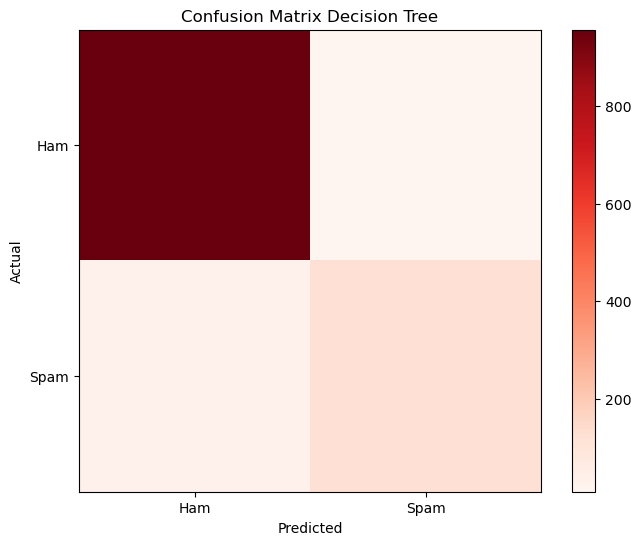

In [31]:
# Visualisasi confusion matrix Decision Tree
plt.figure(figsize=(8, 6))
plt.imshow(dt_cm, interpolation='nearest', cmap=plt.cm.Reds)
plt.title('Confusion Matrix Decision Tree')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.yticks([0, 1], ['Ham', 'Spam'])
plt.show()

In [36]:
# Prediksi pesan manual dengan model SVM
manual_message = ["please come here to get your prize"]
manual_message_tfidf = tfidf_vectorizer.transform(manual_message)
svm_manual_prediction = svm_model.predict(manual_message_tfidf)
print("Manual Message Prediction (SVM):", svm_manual_prediction[0])

# Prediksi pesan manual dengan model Naive Bayes
nb_manual_prediction = nb_model.predict(manual_message_tfidf)
print("Manual Message Prediction (Naive Bayes):", nb_manual_prediction[0])

# Prediksi pesan manual dengan model Decision Tree
dt_manual_prediction = dt_model.predict(manual_message_tfidf)
print("Manual Message Prediction (Decision Tree):", dt_manual_prediction[0])


Manual Message Prediction (SVM): ham
Manual Message Prediction (Naive Bayes): ham
Manual Message Prediction (Decision Tree): ham
